First 5 rows of the dataset:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
Mean Squared Error: 2292721545725.3623
R-Squared Score: 0.546406235549

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


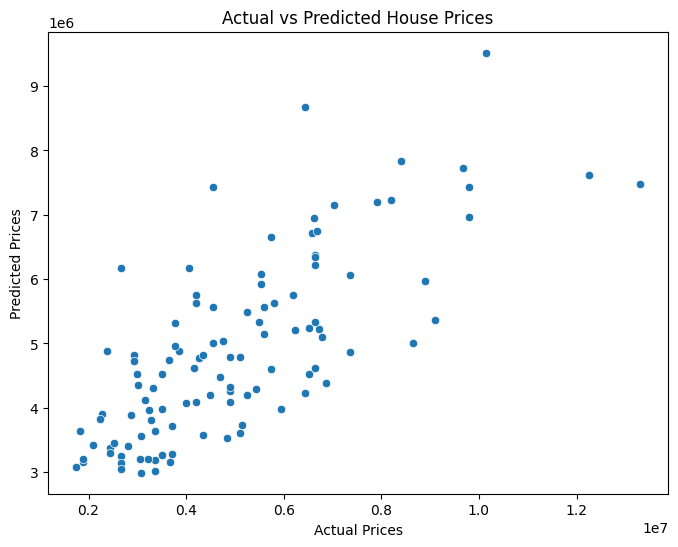

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = "/content/Housing.csv"  # Change this if the file is stored elsewhere
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# Convert categorical columns (yes/no) to binary (1/0)
categorical_columns = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea"]
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.map({'yes': 1, 'no': 0}))

# Convert furnishing status to numerical values
df["furnishingstatus"] = df["furnishingstatus"].map({"unfurnished": 0, "semi-furnished": 1, "furnished": 2})

# Select features (independent variables) and target (dependent variable)
features = ["area", "bedrooms", "bathrooms", "stories", "parking"]
X = df[features]  # Input variables
y = df["price"]  # Target variable (house price)

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display model evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R-Squared Score: {r2}")

# Predict house price for a new input
sample_house = np.array([[3000, 3, 2, 2, 1]])  # Example house: 3000 sqft, 3 bedrooms, 2 bathrooms, 2 stories, 1 parking space
predicted_price = model.predict(sample_house)
print(f"Predicted Price for House (3000 sqft, 3 beds, 2 baths, 2 stories, 1 parking): {predicted_price[0]}")

# Plot Actual vs Predicted Prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()
